<a href="https://colab.research.google.com/github/MadumithaSakthivel/Prediction-of-Driver-Alert/blob/main/FordStayAlert_VeltechEce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction of Driver Alert
Approach to the Machine Learning Problem

Load the data and load libraries
Data Preparation and Data Transformation
Data Visualization
Multivariate Analysis
Classification
Random Forest
Boosting
Hyper Parameter Tuning using Grid Search and Randomized Search







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score



Load the data

In [ ]:
!unzip '/content/stayalert.zip'

Archive:  /content/stayalert.zip
replace Solution.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

load the data

In [ ]:
train = pd.read_csv('/content/fordTrain.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

In [ ]:
train.describe()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,...,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,250.167657,603.841765,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,...,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,145.446164,348.931601,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,...,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,0.000000,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,...,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,125.000000,302.000000,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,...,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,250.000000,604.000000,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,...,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,374.000000,906.000000,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,...,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,510.000000,1210.000000,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,...,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


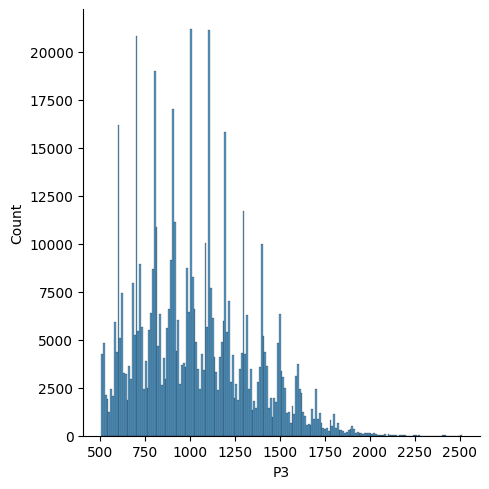

In [ ]:
sns.displot(train['P3'])

In [ ]:
train.skew()

TrialID     0.024138
ObsNum      0.000214
IsAlert    -0.319185
P1          2.445986
P2          0.863450
P3          0.507984
P4          0.643117
P5         20.225034
P6         89.789752
P7          1.937124
P8          0.000000
E1          0.766075
E2          0.754220
E3          3.352342
E4         -2.467771
E5          0.175100
E6         -0.469872
E7          2.844119
E8          2.200218
E9         -2.292728
E10        -0.433540
E11         4.062888
V1         -0.941470
V2         -0.759452
V3          0.261053
V4          5.144928
V5          1.667496
V6         -0.871827
V7          0.000000
V8          0.406715
V9          0.000000
V10        -1.172114
V11        21.165566
dtype: float64

<Axes: >

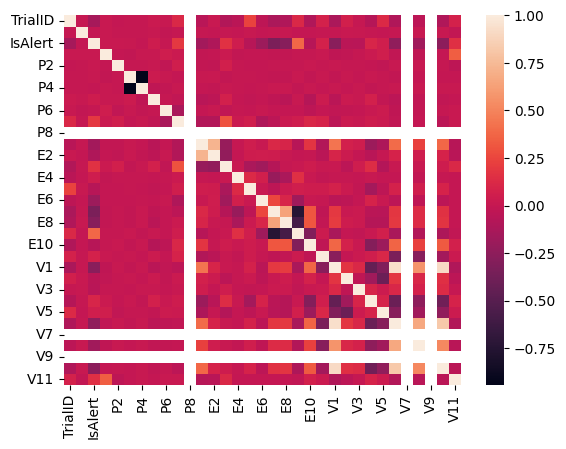

In [ ]:
sns.heatmap(train.corr())

split the data

In [ ]:
x=train.iloc[:,3:]
y=train['IsAlert']

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(483463, 30)
(120866, 30)
(483463,)
(120866,)


Logistic Regression

In [ ]:
#initialize the model
lr = LogisticRegression()
#train the model
lr.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.coef_

array([[ 1.05009078e-03,  4.35523525e-03,  5.08678032e-04,
         8.50925466e-03,  6.11110248e-04,  3.55701124e-03,
         6.13940622e-02,  0.00000000e+00,  9.49932099e-03,
        -1.58125026e-03,  4.73905493e-03,  6.66454994e-03,
        -5.22536295e-06, -2.01632948e-02, -4.13430757e-02,
        -2.19196785e-02,  6.87655438e-03, -1.18970541e-02,
         2.95435412e-04, -1.96829355e-02, -3.54269658e-04,
        -1.69040031e-04, -2.63998605e-03, -4.91888849e-04,
         5.55942311e-04,  0.00000000e+00, -1.21087829e-02,
         0.00000000e+00, -1.68408098e-03,  5.67492291e-02]])

In [ ]:
lr.intercept_

array([0.00021322])

Implement Logistic Regression on test data

In [ ]:
y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)

In [ ]:
def model_eval(actual, predicted):
  acc_score = accuracy_score(actual, predicted)
  conf_matrix = confusion_matrix(actual, predicted)
  clas_report = classification_report(actual, predicted)
  print('The Accuracy of the model is:', acc_score)
  print(conf_matrix)
  print(clas_report)

Training accuracy - Logistic Regression

In [ ]:
model_eval(y_train, y_hat_train)

The Accuracy of the model is: 0.7069393107642157
[[130744  72822]
 [ 68862 211035]]
              precision    recall  f1-score   support

           0       0.66      0.64      0.65    203566
           1       0.74      0.75      0.75    279897

    accuracy                           0.71    483463
   macro avg       0.70      0.70      0.70    483463
weighted avg       0.71      0.71      0.71    483463




 Testing accuracy - Logistic Regression

In [ ]:
model_eval(y_test, y_hat_test)

The Accuracy of the model is: 0.7060546390217265
[[32678 18300]
 [17228 52660]]
              precision    recall  f1-score   support

           0       0.65      0.64      0.65     50978
           1       0.74      0.75      0.75     69888

    accuracy                           0.71    120866
   macro avg       0.70      0.70      0.70    120866
weighted avg       0.71      0.71      0.71    120866



Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Initialize the model
rf = RandomForestClassifier(n_estimators=200)
#fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_hat_train_rf = rf.predict(X_train)
y_hat_test_rf = rf.predict(X_test)

Training Accuracy - Random Forest

In [ ]:
model_eval(y_train, y_hat_train_rf)

The Accuracy of the model is: 1.0
[[203566      0]
 [     0 279897]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203566
           1       1.00      1.00      1.00    279897

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463



Testing Accuracy - Random Forest

In [ ]:
model_eval(y_test, y_hat_test_rf)

The Accuracy of the model is: 0.9945559545281552
[[50385   593]
 [   65 69823]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     50978
           1       0.99      1.00      1.00     69888

    accuracy                           0.99    120866
   macro avg       1.00      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866



AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#Initialize the model
ada = AdaBoostClassifier(n_estimators=200)
#Fit the model
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200)

In [ ]:
y_hat_train_ada = ada.predict(X_train)
y_hat_test_ada = ada.predict(X_test)

Training Accuracy - AdaBoost Classifier

In [ ]:
model_eval(y_train, y_hat_train_ada)

The Accuracy of the model is: 0.8660662760128489
[[163279  40287]
 [ 24465 255432]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83    203566
           1       0.86      0.91      0.89    279897

    accuracy                           0.87    483463
   macro avg       0.87      0.86      0.86    483463
weighted avg       0.87      0.87      0.87    483463



Testing Accuracy - AdaBoost Classifier

In [ ]:
model_eval(y_test, y_hat_test_ada)

The Accuracy of the model is: 0.8658762596594576
[[40854 10124]
 [ 6087 63801]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83     50978
           1       0.86      0.91      0.89     69888

    accuracy                           0.87    120866
   macro avg       0.87      0.86      0.86    120866
weighted avg       0.87      0.87      0.86    120866



Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#Initialize the model
gb= GradientBoostingClassifier()
#Fit the model
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_hat_train_gb = gb.predict(X_train)
y_hat_test_gb = gb.predict(X_test)

Training Accuracy - Gradient Boosting Classifier

In [ ]:
model_eval(y_train, y_hat_train_ada)

The Accuracy of the model is: 0.8660662760128489
[[163279  40287]
 [ 24465 255432]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83    203566
           1       0.86      0.91      0.89    279897

    accuracy                           0.87    483463
   macro avg       0.87      0.86      0.86    483463
weighted avg       0.87      0.87      0.87    483463



Testing Accuracy - Gradient Boosting Classifier

In [ ]:
model_eval(y_test, y_hat_test_ada)

The Accuracy of the model is: 0.8658762596594576
[[40854 10124]
 [ 6087 63801]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83     50978
           1       0.86      0.91      0.89     69888

    accuracy                           0.87    120866
   macro avg       0.87      0.86      0.86    120866
weighted avg       0.87      0.87      0.86    120866



Hyper Parameter Tuning using Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid = {
    'n_estimators': np.arange(100, 1000, 100),  # Number of trees
    'max_depth': np.arange(2, 20, 2),  # Maximum depth of each tree
}

In [ ]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=10, cv=5, random_state=42)

In [ ]:
random_search.fit(X_train, y_train)